# Pixel Threshold Benchmarking Demo

In this notebook, we will explore:
- the old version of pixel_threshold (unit: number of rows), and 
- the new version of pixel threshold (unit: in-memory-size).

We are mainly looking to benchmark:
- **computational performance**: how much longer will the new version take? can we optimize this after the first stab at it?
- **improvement in parquet size variability**: will our output pixel files have more consistent overall file sizes with the new version?

## Issue #449: Add an option to set pixel threshold in bytes

https://github.com/astronomy-commons/hats-import/issues/449

> It would be very useful to threshold pixels by in-memory-size instead of number of rows.  
> This would provide more homogeneous pixels sizes when using nested types such as lists, strings and bytes.  
> It is useful for datasets like ZTF DRs or ZTF/LSST alerts.

## Working notes
I have briefly discussed my approach to this issue with Kostya.

Kostya recommends:
1. In this notebook, I should use ZTF DR22
    - I can get this via data.lsdb.io
2. But because  it'll be so big, I should just select few input files. I can use the HATS version of the ZTF DR and just reimport it, making two different subsets.
    - A catalog made with a cone search in low dec for short lightcurves, and
    - A catalog made with a cone search in the milky way (medium/positive dec) for long lightcurves
4. These subsets should be ~a few MBs (not! half a GB)
    - Once they look right, save them to hats cats
5. Then read these subset cats in again for use in this notebook

## Dask

In [ ]:
# TODO

## Create subset cats of ZTF DR 22

In [ ]:
import lsdb
from lsdb.core.search import ConeSearch

In [5]:
ztf = lsdb.open_catalog('https://data.lsdb.io/hats/ztf_dr22/ztf_lc', margin_cache='https://data.lsdb.io/hats/ztf_dr22/ztf_lc_10arcs')
ztf

,objectid,filterid,objra,objdec,nepochs,hmjd,mag,magerr,clrcoeff,catflags
npartitions=10839,,,,,,,,,,
"Order: 4, Pixel: 0",int64[pyarrow],int8[pyarrow],float[pyarrow],float[pyarrow],int64[pyarrow],list<element: double>[pyarrow],list<element: float>[pyarrow],list<element: float>[pyarrow],list<element: float>[pyarrow],list<element: int32>[pyarrow]
"Order: 4, Pixel: 1",...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...
"Order: 5, Pixel: 12286",...,...,...,...,...,...,...,...,...,...
"Order: 5, Pixel: 12287",...,...,...,...,...,...,...,...,...,...


(<Figure size 1000x500 with 2 Axes>, <WCSAxes: >)

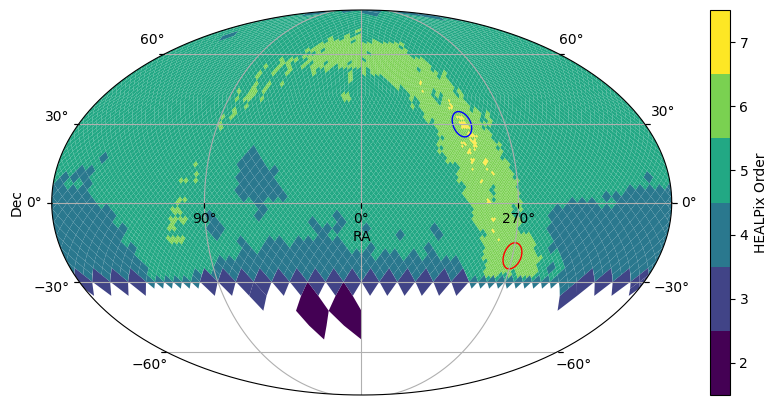

In [25]:
low_cone_search = ConeSearch(ra=-90.0, dec=-20.0, radius_arcsec=5 * 3600)
high_cone_search = ConeSearch(ra=-63.0, dec=30.0, radius_arcsec=5 * 3600)

ztf.plot_pixels()

low_cone_search.plot(fc="#00000000", ec="red")
high_cone_search.plot(fc="#00000000", ec="blue")

In [27]:
ztf_low = ztf.search(low_cone_search)
ztf_low

,objectid,filterid,objra,objdec,nepochs,hmjd,mag,magerr,clrcoeff,catflags
npartitions=115,,,,,,,,,,
"Order: 6, Pixel: 28879",int64[pyarrow],int8[pyarrow],float[pyarrow],float[pyarrow],int64[pyarrow],list<element: double>[pyarrow],list<element: float>[pyarrow],list<element: float>[pyarrow],list<element: float>[pyarrow],list<element: int32>[pyarrow]
"Order: 6, Pixel: 28888",...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...
"Order: 6, Pixel: 29476",...,...,...,...,...,...,...,...,...,...
"Order: 6, Pixel: 29477",...,...,...,...,...,...,...,...,...,...


In [ ]:
df_low = ztf_low.head(1)

In [ ]:
ztf_high = ztf.search(high_cone_search)
ztf_high

In [ ]:
df_high = ztf_high.head(1)